In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from os.path import isfile, join, expanduser
from os import listdir

sample_name = '2layers'
path = '../fit_outputs/'
onlyfiles_keys = [
    f for f in listdir(path)
    if isfile(join(path, f)) and f.endswith('.csv') and f.startswith(sample_name) and 'reflectivit' in f
]

print("Found files:", onlyfiles_keys)
labels = []
exp_data_all = []

# Process each file
for filename in onlyfiles_keys:
    label = filename[:-4]  # strip .csv
    full_path = join(path, filename)
    df = pd.read_csv(full_path)

    # Normalize column names
    df.rename(columns={
        'energy': 'Energy',
        'aoi': 'Theta'
    }, inplace=True)
    df['file_name'] = label
    labels.append(label)
    exp_data_all.append(df)


Found files: ['2layers_reflectivity_20250922_115038.csv']


In [2]:
# Combine all dataframes
combined_df = pd.concat(exp_data_all, ignore_index=True)
combined_df.columns

unique_labels_series = pd.Series(combined_df['file_name'].unique())
unique_labels_series

0    2layers_reflectivity_20250922_115038
dtype: object

['2layers_reflectivity_20250922_115038']
250.0


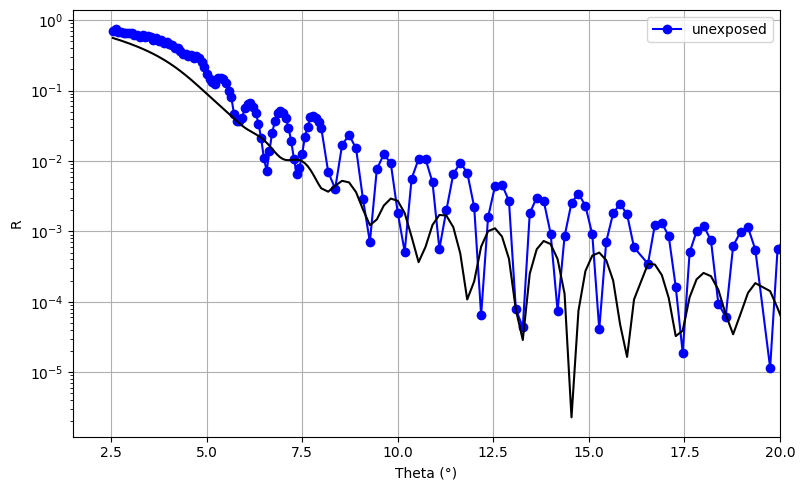

284.0


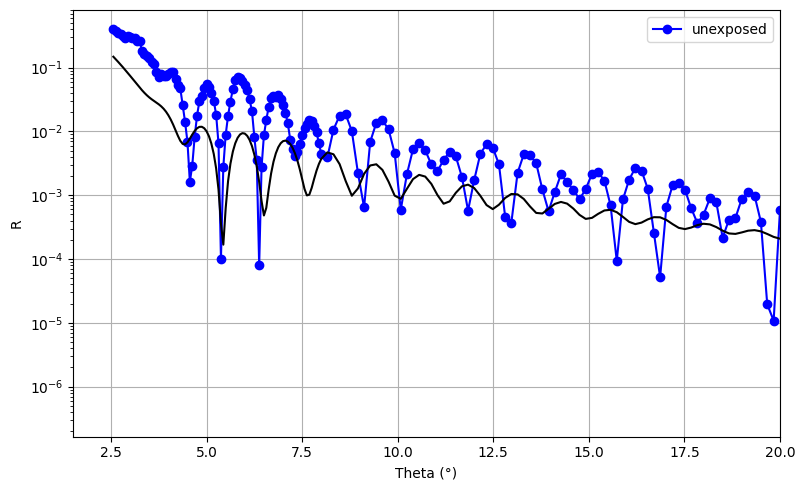

284.2


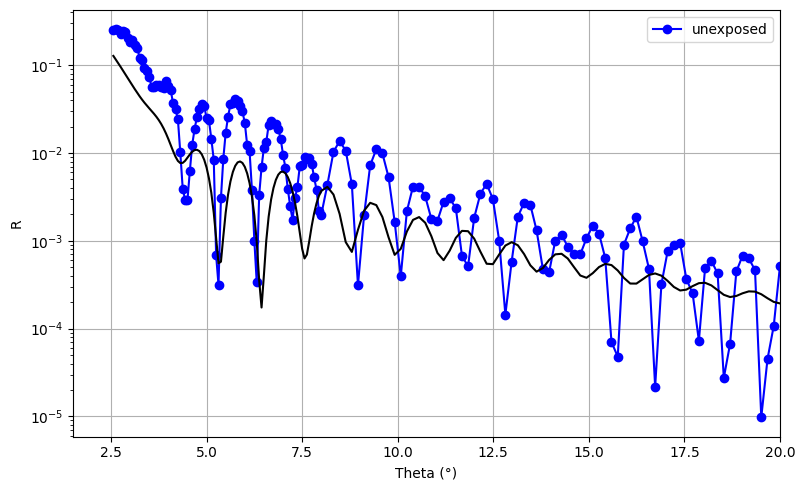

284.6


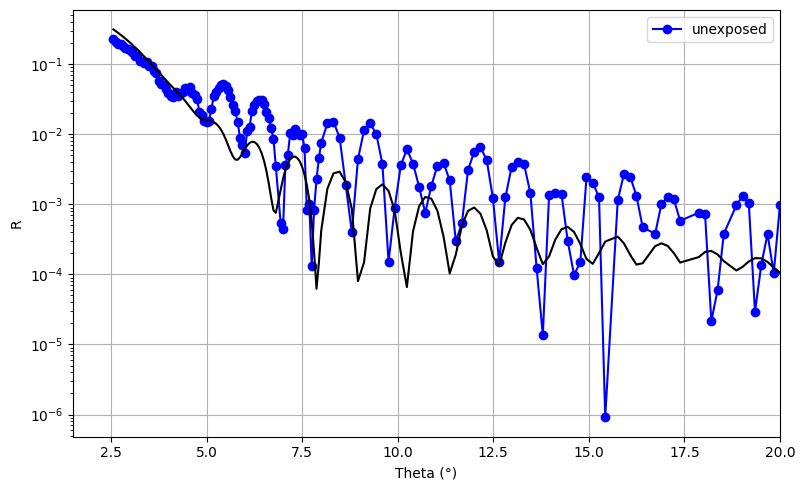

285.0


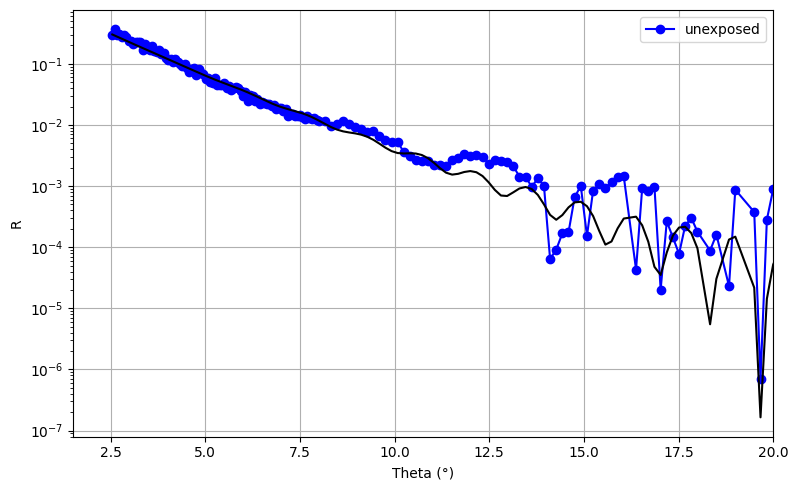

285.5


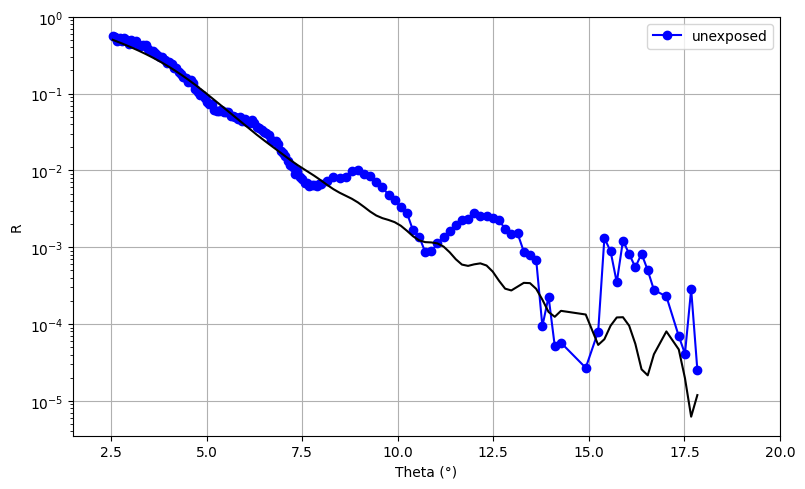

286.0


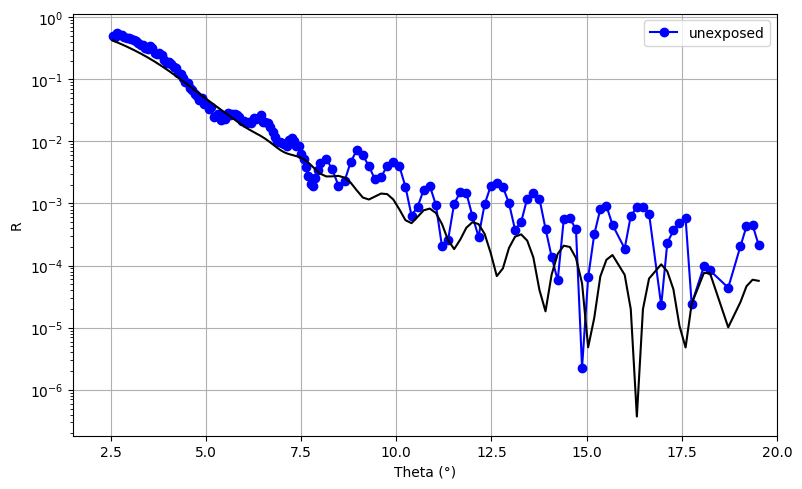

286.5


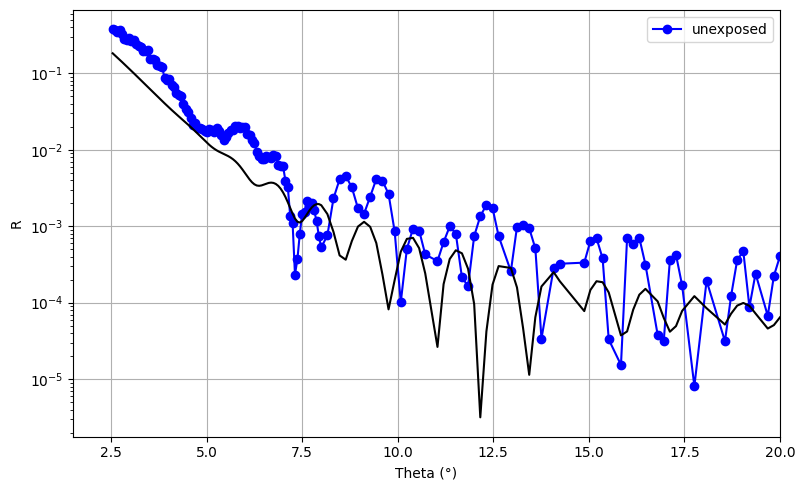

287.0


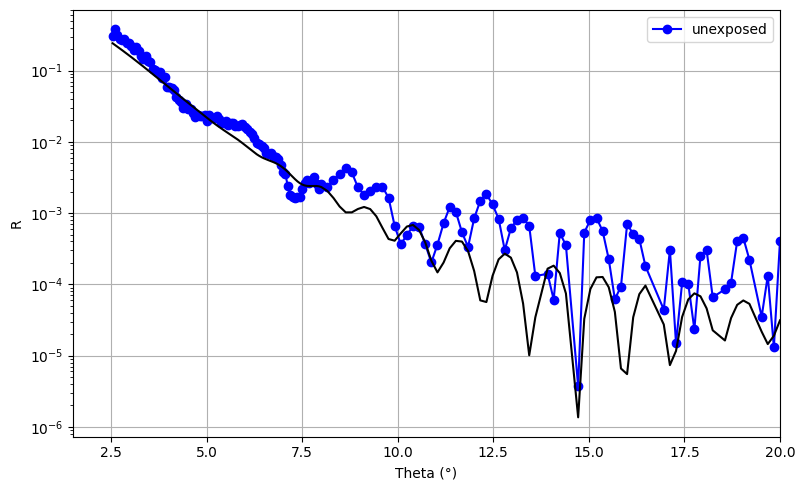

287.7


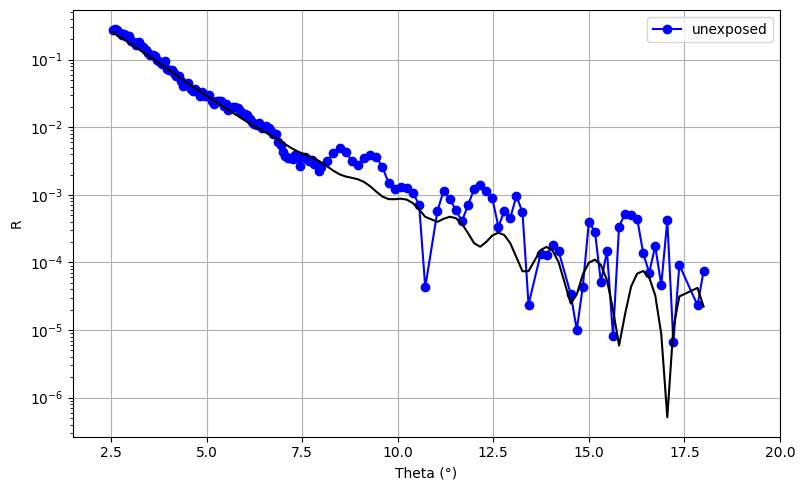

288.6


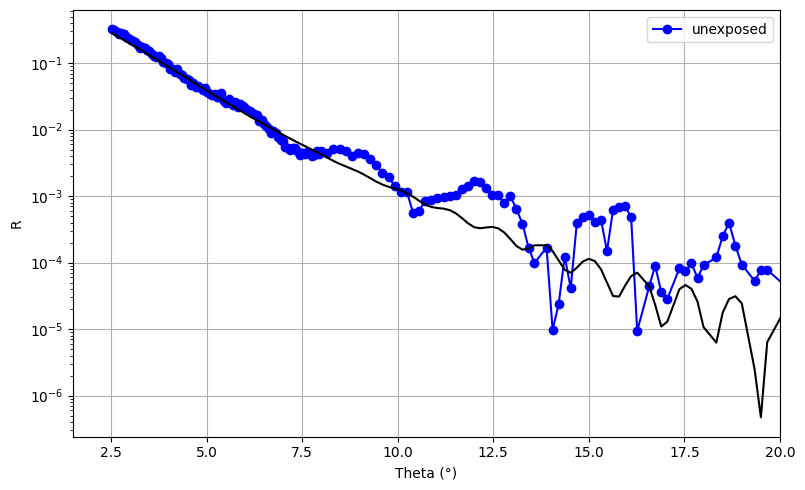

In [5]:
import matplotlib.pyplot as plt

# Ensure the ratio column exists
combined_df['R_ratio'] = combined_df['R_sim'] / combined_df['R_exp']

# Get unique energies
unique_energies = combined_df['Energy'].unique()
unique_labels_series = pd.Series(combined_df['file_name'].unique())
trimmed_labels = unique_labels_series#.drop([0, 2])
trimmed_labels = list(trimmed_labels)
#trimmed_labels[1], trimmed_labels[2] = trimmed_labels[2], trimmed_labels[1]

print(trimmed_labels)
names = ['unexposed', 'exposed', 'PEB']  # Custom labels for each group
colors = ['blue', 'green', 'purple', 'orange']

# Plot for each energy
for energy in sorted(unique_energies):
    subset = combined_df[combined_df['Energy'] == energy]
    print(energy)
    plt.figure(figsize=(8, 5))

    for i,label in enumerate(trimmed_labels):
        subsubset = subset[subset['file_name']==label]
        plt.plot(subsubset['Theta'], subsubset['R_exp']*10**i, marker='o', linestyle='-', label=names[i],color=colors[i])
        plt.plot(subsubset['Theta'], subsubset['R_sim']*10**i, linestyle='-', color='black')

    #plt.title(f"Theta vs R_sim / R_exp at {energy} eV")
    plt.xlabel("Theta (°)")
    plt.ylabel("R")
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xlim(1.5,20)
    plt.show()